In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_roc_curve
import matplotlib.pyplot as plt
import numpy as np
import graphviz

In [35]:
colNames = ['class', 
'cap-shape',
'cap-surface',
'cap-color',
'bruises?',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'veil-color',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat']

featuresNames = ['cap-shape',
'cap-surface',
'cap-color',
'bruises?',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
#'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'veil-color',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat']

In [36]:
data_src = pd.read_csv('../datasets/Mushrooms/agaricus-lepiota.data',header=None, names=colNames)

In [37]:
data_src.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [38]:
data_src.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
print("Dataset shape:", data_src.shape)

Dataset shape: (8124, 23)


In [40]:
data_src['class'].unique()

array(['p', 'e'], dtype=object)

In [41]:
data_src['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [42]:
df = data_src.astype('category')

In [43]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises?                    category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

## 0. Basic cleaning

In [65]:
data_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [102]:
data = data_src.drop(axis=1, columns=['stalk-root'])
data = pd.get_dummies(data.dropna(), columns=featuresNames)

KeyError: "['stalk-root'] not in index"

KeyError: "['stalk-root'] not found in axis"

In [76]:
data.info

<bound method DataFrame.info of      class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        p            0            0            0            0            0   
1        e            0            0            0            0            0   
2        e            1            0            0            0            0   
3        p            0            0            0            0            0   
4        e            0            0            0            0            0   
...    ...          ...          ...          ...          ...          ...   
8119     e            0            0            0            1            0   
8120     e            0            0            0            0            0   
8121     e            0            0            1            0            0   
8122     p            0            0            0            1            0   
8123     e            0            0            0            0            0   

      cap-shape_x  

In [58]:
X = data.drop(axis=1, columns=['class'])
Y = pd.DataFrame(data['class'])

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [62]:
Y_train.value_counts()

e    2972
p    2714
Name: class, dtype: int64

In [74]:
np.where(data_src == '?', 1, 0).sum().sum()

2480

## 1. Decision tree

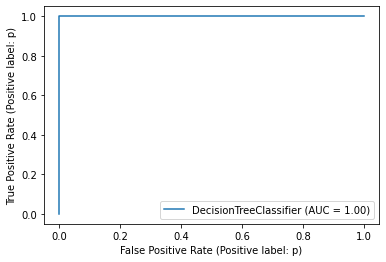

In [47]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)
plot_roc_curve(dt, X_test, Y_test)

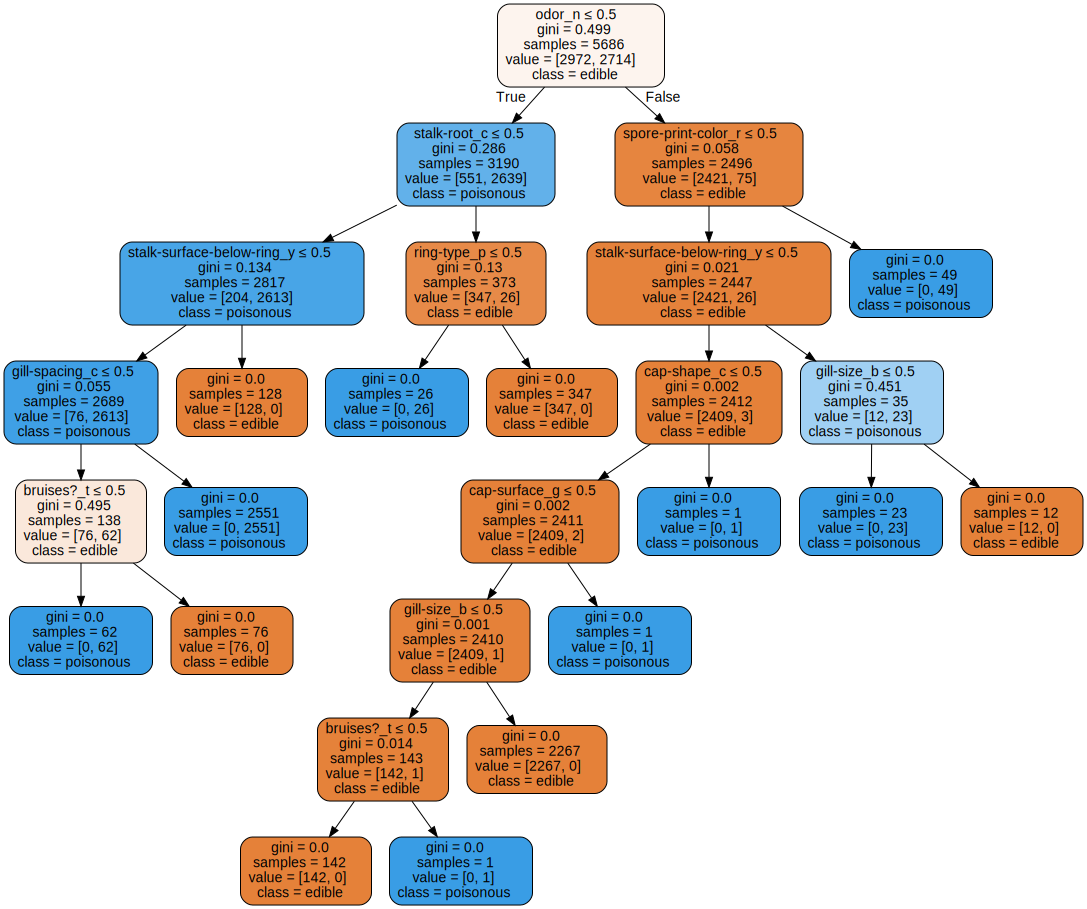

In [63]:
dot_data = tree.export_graphviz(dt, feature_names= X.columns, class_names=['edible', 'poisonous'],out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [95]:
data_src[ (data_src['odor']=='n') & (data_src['spore-print-color']=='r')]['class'].value_counts()

p    72
Name: class, dtype: int64

In [96]:
data_src[ (data_src['odor']!='n') & (data_src['stalk-root']=='c') & (data_src['ring-type'] =='p')]['class'].value_counts()

e    512
Name: class, dtype: int64

In [97]:
data_src[ (data_src['odor']!='n') & (data_src['stalk-root']=='c') & (data_src['ring-type'] !='p')]['class'].value_counts()

p    36
Name: class, dtype: int64

In [99]:
data_src['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

## 2. SVM Linéaire

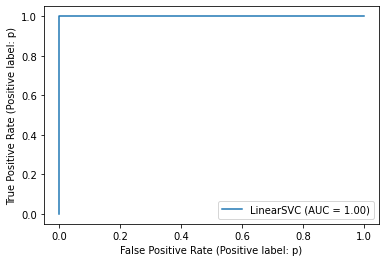

In [9]:
svmLinear = svm.LinearSVC()
svmLinear.fit(X_train, Y_train)
plot_roc_curve(svmLinear, X_test, Y_test)

## 3. SVM avec d'autres Kernel

### RBF

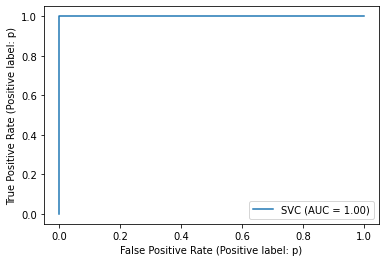

In [10]:
svmRBF = svm.SVC(kernel='rbf')
svmRBF.fit(X_train, Y_train)
plot_roc_curve(svmRBF, X_test, Y_test)

### Polynomial

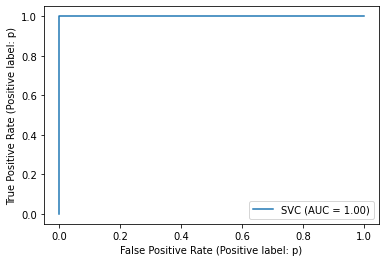

In [11]:
svmPoly = svm.SVC(kernel='poly')
svmPoly.fit(X_train, Y_train)
plot_roc_curve(svmPoly, X_test, Y_test)

## 4. Neural Network

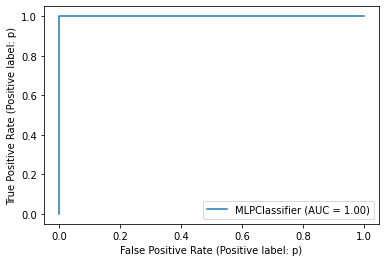

In [12]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,1), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)

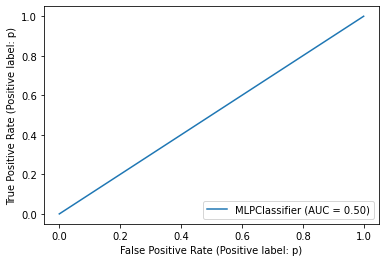

In [13]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,5,1), random_state=1)
nnc.fit(X_train, Y_train)
plot_roc_curve(nnc, X_test, Y_test)